<a href="https://colab.research.google.com/github/Akinlaso-codes/apply_datat_sci_lab/blob/main/DSN_FREE_AI_CLASS_DAY_5_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# New Section

In [5]:
dataset = pd.read_csv('/content/Salary_Data.csv', header=0) # import dataset


In [6]:
dataset.info() # information about the dataset such as no. of entries, no. null/non-null, data type, columns/no. of columns etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [7]:
dataset.describe() # statistical summary of the dataset

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [8]:
corr = dataset.corr() # correlation matrix
corr

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


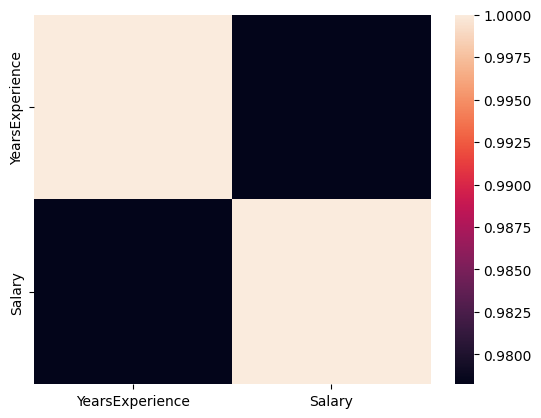

In [9]:
hm = sns.heatmap(corr) #visual representative of correlation above

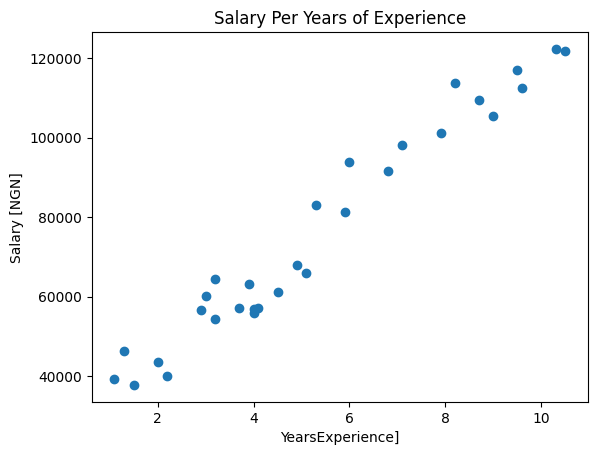

In [10]:
# plot showing the relationship between variables
plt.scatter(x=dataset["YearsExperience"], y=dataset["Salary"])
plt.xlabel("YearsExperience]")
plt.ylabel("Salary [NGN]")
plt.title("Salary Per Years of Experience");

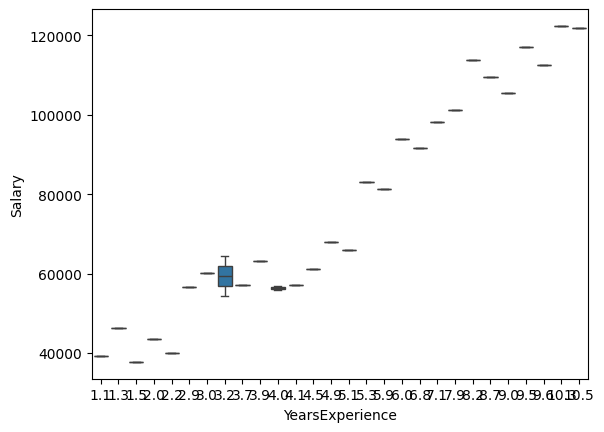

In [12]:
sns.boxplot(x="YearsExperience", y="Salary", data=dataset);

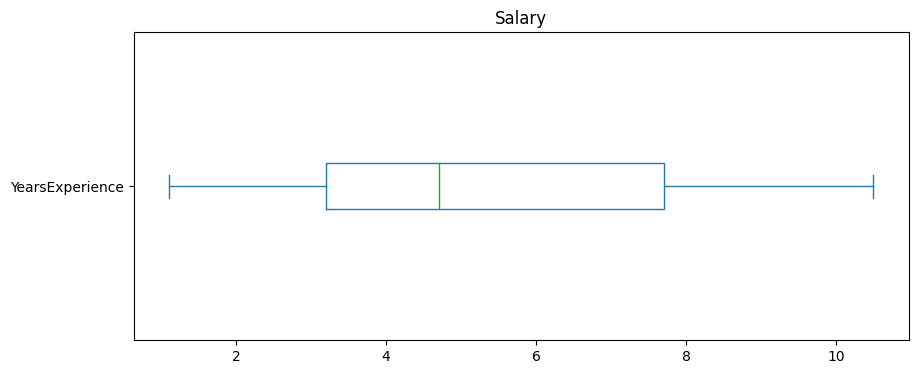

In [13]:
fig, ax = plt.subplots(figsize=(10, 4))
dataset["YearsExperience"].plot(kind="box", vert=False, title="Salary", ax=ax);

In [40]:
target = "Salary"
X = dataset.drop(columns=target)

y = dataset[target]

print('y Shape is:', y.shape)
print('X Shape is:', X.shape)

y Shape is: (30,)
X Shape is: (30, 1)


In [39]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [77]:
y_mean = y_train.mean()
y_mean

74207.625

In [43]:
y_pred_baseline = y_mean
y_pred_baseline

# convert y_pred_baseline into list and make it the lenght of y_train
y_pred_baseline = [y_mean] * len(y_train)

# set len of both sides == to each other to confirm whether True or False
len(y_pred_baseline) == len(y_train)

True

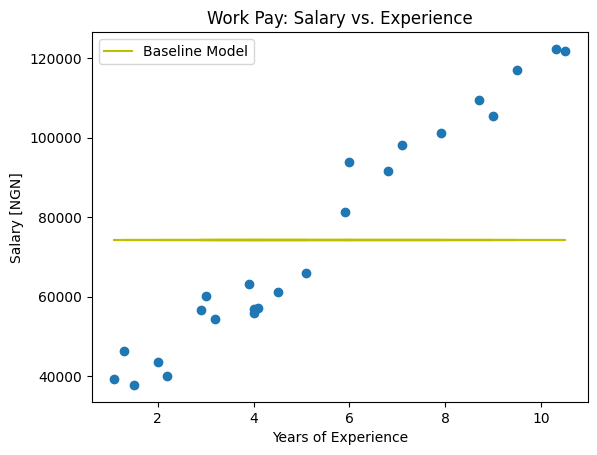

In [78]:
plt.plot(X_train.values, y_pred_baseline, color="y", label="Baseline Model")

plt.scatter(X_train, y_train)
plt.xlabel("Years of Experience")
plt.ylabel("Salary [NGN]")
plt.title("Work Pay: Salary vs. Experience")
plt.legend();

In [44]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (24, 1)
y_train shape: (24,)
X_test shape: (6, 1)
y_test shape: (6,)


In [45]:
y_train.head()

28    122391.0
24    109431.0
12     56957.0
0      39343.0
4      39891.0
Name: Salary, dtype: float64

In [46]:
mae_baseline = mean_absolute_error(y_train, y_pred_baseline) #two values are put as argument: the actual value (in this case, the Salary) and the baseline prediction, which is y_pred_baseline

print("Mean Salary", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean Salary 74207.62
Baseline MAE: 25065.4


In [47]:
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
intercept = round(regressor.intercept_) #(2)
intercept

25322

In [49]:
coeficient = regressor.coef_.round(2)
coeficient

array([9423.82])

In [33]:
# Salary Regression Model
# y = b0 + b1
# Salary =  25321.58 + 9423.82*YearsExperience

In [50]:
regressor.score(X_train,y_train)

0.9645401573418146

In [51]:
y_pred_training = regressor.predict(X_train)
y_pred_training[:10]

array([122386.880839  , 107308.77632215,  63016.8443039 ,  35687.77986711,
        46053.97672244,  73383.04115923,  52650.64744857,  63959.2258362 ,
        63016.8443039 ,  99769.72406372])

In [80]:
# combine the predicted salary with original salary and years of experience in a dataframe for comparison
new_Dataset = X_train.copy()
new_Dataset['y_train'] = y_train
new_Dataset['y_pred_training'] = y_pred_training
new_Dataset.head()

,YearsExperience,y_train,y_pred_training
28,10.3,122391.0,122386.880839
24,8.7,109431.0,107308.776322
12,4.0,56957.0,63016.844304
0,1.1,39343.0,35687.779867
4,2.2,39891.0,46053.976722


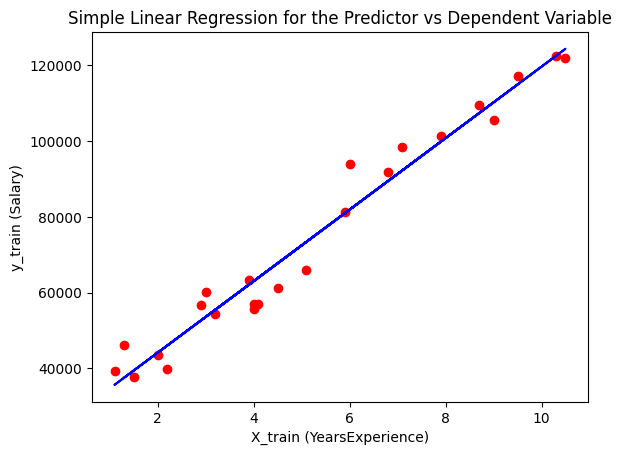

In [67]:
plt.scatter(X_train,y_train, color = 'red'); # scatter plot for the X and dataset

plt.plot(X_train, y_pred_training, color = 'b'); # line plot for the X and y_pred

plt.title('Simple Linear Regression for the Predictor vs Dependent Variable')
plt.xlabel('X_train (YearsExperience)')
plt.ylabel('y_train (Salary)')
plt.show()

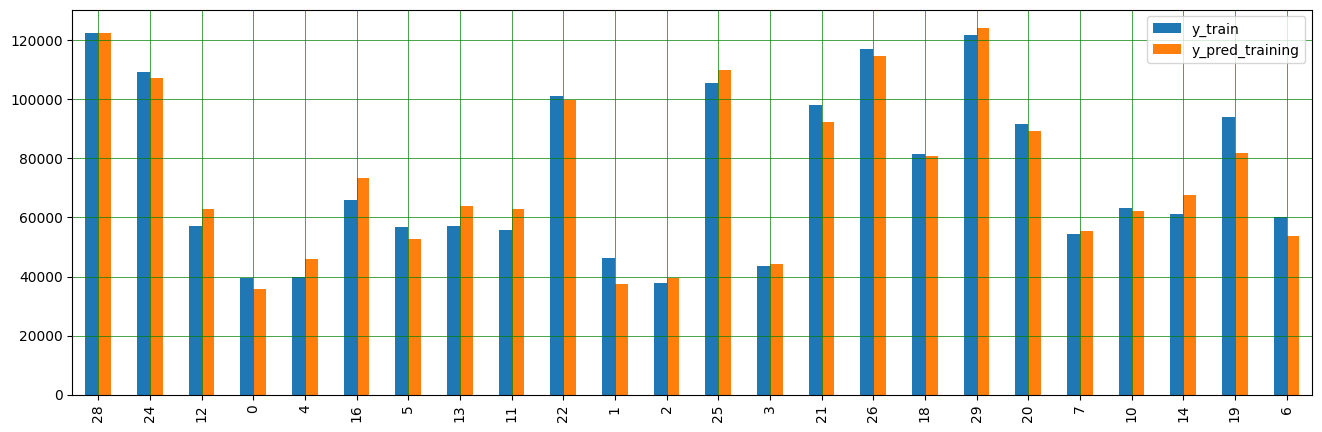

In [70]:
# Plot showing the difference beteen actual y and the predicted y
new_Dataset[['y_train', 'y_pred_training']].plot(kind = 'bar', figsize= (16,5))
plt.grid(which='major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which='minor', linestyle = '--', linewidth = '0.5', color = 'black')
plt.show()

In [71]:
from sklearn.metrics import mean_absolute_error
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 4221.05


In [75]:
# Do it yourself approach

# Slicing out y and p_red values (yhat)
result = new_Dataset[['y_train', 'y_pred_training']]
print(result)

n = len(result)
n

# Create a new column in th result table to show the difference between y and yhat values
result['error'] = result['y_train'].subtract(result['y_pred_training'])
result

cost_function = abs(result['error']).sum()

mean_absolute_error = cost_function/n


print()
print(cost_function)
print(mean_absolute_error)
result.head()

     y_train  y_pred_training
28  122391.0    122386.880839
24  109431.0    107308.776322
12   56957.0     63016.844304
0    39343.0     35687.779867
4    39891.0     46053.976722
16   66029.0     73383.041159
5    56642.0     52650.647449
13   57081.0     63959.225836
11   55794.0     63016.844304
22  101302.0     99769.724064
1    46205.0     37572.542932
2    37731.0     39457.305996
25  105582.0    110135.920919
3    43525.0     44169.213658
21   98273.0     92230.671805
26  116969.0    114847.828581
18   81363.0     80922.093418
29  121872.0    124271.643904
20   91738.0     89403.527208
7    54445.0     55477.792045
10   63218.0     62074.462772
14   61111.0     67728.751965
19   93940.0     81864.474950
6    60150.0     53593.028981

101305.12162679373
4221.046734449738


,y_train,y_pred_training,error
28,122391.0,122386.880839,4.119161
24,109431.0,107308.776322,2122.223678
12,56957.0,63016.844304,-6059.844304
0,39343.0,35687.779867,3655.220133
4,39891.0,46053.976722,-6162.976722


In [76]:
# USING SKLEARN

from sklearn import metrics

print('Mean Absolute Error is:', metrics.mean_absolute_error(y_train, y_pred_training))
print('Mean Squared Error is:', metrics.mean_squared_error(y_train, y_pred_training))
print('Root Mean Squared Error is:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_training)))

Mean Absolute Error is: 4221.046734449738
Mean Squared Error is: 27102249.73126139
Root Mean Squared Error is: 5205.982110155719
